<a href="https://colab.research.google.com/github/mariabandeira/gunviolence/blob/main/violenciaescolarnovo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Importando 4 abas do arquivo de excel

df_incid = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=1)
df_shoot = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=2)
df_victm = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=3)
df_weapn = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=4)

In [3]:
# Importando região dos EUA

df_region = pd.read_csv("https://raw.githubusercontent.com/mariliabrito/gunviolence/main/states.csv")
df_region['State'] = df_region['State Code']

In [4]:
# Juntando tabelas df_incid e df_region

df_reg = pd.merge(df_incid, df_region, on='State')
df_reg

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,State Code,Region,Division
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,No,No,NaN,No,100,No,IL,Midwest,East North Central
1,20220529ILDAC,https://abc7chicago.com/chicago-shooting-crime...,5,Local,4,2022-05-29,Spring,Daniel Webster Public School,Chicago,IL,...,No,No,No,NaN,No,97,No,IL,Midwest,East North Central
2,20220525ILSTC,https://www.chicagocatholic.com/chicagoland/-/...,1,Local,4,2022-05-25,Spring,St. Margaret of Scotland School,Chicago,IL,...,No,No,No,No,No,5,No,IL,Midwest,East North Central
3,20220520ILSOP,https://www.myjournalcourier.com/news/article/...,1,Local,3,2022-05-20,Spring,South Elementary School,Pittsfield,IL,...,No,No,No,No,No,1,No,IL,Midwest,East North Central
4,20220517ILWAC,https://abc7chicago.com/disney-magnet-school-s...,10,Regional,4,2022-05-17,Spring,Walt Disney Magnet School,Chicago,IL,...,No,No,No,No,No,1,No,IL,Midwest,East North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,20140128HIPRH,http://articles.chicagotribune.com/keyword/roo...,NaN,NaN,2,2014-01-28,Winter,President Theodore Roosevelt High,Honolulu,HI,...,Yes,NaN,NaN,NaN,NaN,1,NaN,HI,West,Pacific
2064,20110523HIHIP,http://www.staradvertiser.com/2011/06/15/break...,1-5,Local,3,2011-05-23,Spring,Highlands Intermediate School,Pearl City,HI,...,No,No,No,No,No,1,NaN,HI,West,Pacific
2065,19880630HIAIO,https://www.newspapers.com/image/263060322/?te...,NaN,NaN,3,1988-06-30,Summer,Aiea High School,Oahu,HI,...,No,No,No,No,No,1,NaN,HI,West,Pacific
2066,19930917WYCES,http://buffalonews.com/1993/09/18/gunman-wound...,NaN,NaN,2,1993-09-17,Fall,Central Junior High School,Sheridan,WY,...,No,No,No,No,No,30,Yes,WY,West,Mountain


In [5]:
victm = df_victm['incidentid'].value_counts()
victm_incid = victm.to_frame()
victm_incid

,incidentid
19860516WYCOC,74
20220524TXROU,39
19990420COCOL,37
19890117CACLS,35
20180214FLMAP,34
...,...
20150126MNHAR,1
20150215CATEM,1
20150330MOPEU,1
20150417TXSES,1


In [6]:
victm_incid.rename(columns={'incidentid':'victims'}, inplace=True)
victm_incid['Incident_ID'] = victm_incid.index
victm_incid

,victims,Incident_ID
19860516WYCOC,74,19860516WYCOC
20220524TXROU,39,20220524TXROU
19990420COCOL,37,19990420COCOL
19890117CACLS,35,19890117CACLS
20180214FLMAP,34,20180214FLMAP
...,...,...
20150126MNHAR,1,20150126MNHAR
20150215CATEM,1,20150215CATEM
20150330MOPEU,1,20150330MOPEU
20150417TXSES,1,20150417TXSES


In [7]:
# quantidade de vítimas

df_incid2 = df_incid.merge(victm_incid[['Incident_ID', 'victims']], how = 'left')
df_incid2

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,victims
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,No,No,No,No,NaN,No,100,No,3.0
1,20220613WAMAE,https://www.q13fox.com/news/deputies-arrest-15...,5,Local,4,2022-06-13,Summer,Mariner High School,Everett,WA,...,No,No,No,No,No,NaN,No,99,No,NaN
2,20220610ALBYB,https://www.actionnews5.com/2022/06/10/student...,3,Local,4,2022-06-10,Summer,Byhalia High School,Byhalia,MS,...,No,No,No,No,No,NaN,No,1,No,NaN
3,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,1.0
4,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,No,No,No,No,No,NaN,No,99,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,19700226CABAB,https://www.vvdailypress.com/story/news/crime/...,2,Local,4,1979-02-26,Winter,Barstow High School,Barstow,CA,...,No,No,No,Yes,No,No,Yes,6,No,NaN
2065,19700206OHJOC,https://www.newspapers.com/image/18059538/?ter...,NaN,NaN,2,1970-02-06,Winter,John F. Kennedy High School,Cleveland,OH,...,No,No,No,No,No,No,No,4,NaN,1.0
2066,19700105DCUNW,https://www.newspapers.com/image/156467116/?te...,NaN,NaN,2,1970-01-05,Winter,Unnamed High School,Washington,DC,...,No,No,No,No,No,No,No,2,NaN,1.0
2067,19700105DCSOW,https://news.google.com/newspapers?id=AfRYAAAA...,NaN,NaN,3,1970-01-05,Winter,Sousa Junior High,Washington,DC,...,No,No,No,No,No,No,No,1,NaN,1.0


In [8]:
df_incid2['victims'] = df_incid2['victims'].fillna(0)

In [9]:
shooter = df_shoot['incidentid'].value_counts()
shoot_incid = shooter.to_frame()
shoot_incid

,incidentid
19700415ARPIP,8
20220307IAEAD,6
19760212MIMUD,6
20140131IANOD,6
20220519MIEAK,5
...,...
20180313VAGEA,1
20180316MTBIM,1
20180319VADOP,1
20180320MDGRG,1


In [10]:
shoot_incid.rename(columns={'incidentid':'shooters'}, inplace=True)
shoot_incid['Incident_ID'] = shoot_incid.index
shoot_incid

,shooters,Incident_ID
19700415ARPIP,8,19700415ARPIP
20220307IAEAD,6,20220307IAEAD
19760212MIMUD,6,19760212MIMUD
20140131IANOD,6,20140131IANOD
20220519MIEAK,5,20220519MIEAK
...,...,...
20180313VAGEA,1,20180313VAGEA
20180316MTBIM,1,20180316MTBIM
20180319VADOP,1,20180319VADOP
20180320MDGRG,1,20180320MDGRG


In [11]:
# quantidade de atiradores

df_incid2 = df_incid2.merge(shoot_incid[['Incident_ID', 'shooters']], how = 'left')
df_incid2

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,victims,shooters
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,No,No,No,NaN,No,100,No,3.0,1.0
1,20220613WAMAE,https://www.q13fox.com/news/deputies-arrest-15...,5,Local,4,2022-06-13,Summer,Mariner High School,Everett,WA,...,No,No,No,No,NaN,No,99,No,0.0,1.0
2,20220610ALBYB,https://www.actionnews5.com/2022/06/10/student...,3,Local,4,2022-06-10,Summer,Byhalia High School,Byhalia,MS,...,No,No,No,No,NaN,No,1,No,0.0,1.0
3,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,1.0,1.0
4,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,No,No,No,No,NaN,No,99,No,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,19700226CABAB,https://www.vvdailypress.com/story/news/crime/...,2,Local,4,1979-02-26,Winter,Barstow High School,Barstow,CA,...,No,No,Yes,No,No,Yes,6,No,0.0,NaN
2065,19700206OHJOC,https://www.newspapers.com/image/18059538/?ter...,NaN,NaN,2,1970-02-06,Winter,John F. Kennedy High School,Cleveland,OH,...,No,No,No,No,No,No,4,NaN,1.0,1.0
2066,19700105DCUNW,https://www.newspapers.com/image/156467116/?te...,NaN,NaN,2,1970-01-05,Winter,Unnamed High School,Washington,DC,...,No,No,No,No,No,No,2,NaN,1.0,1.0
2067,19700105DCSOW,https://news.google.com/newspapers?id=AfRYAAAA...,NaN,NaN,3,1970-01-05,Winter,Sousa Junior High,Washington,DC,...,No,No,No,No,No,No,1,NaN,1.0,1.0


In [12]:
df_incid2['shooters'] = df_incid2['shooters'].fillna(1) # como o valor é desconhecido, sabe-se que há pelo menos 1 violentador

In [13]:
df_incid2

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,victims,shooters
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,No,No,No,NaN,No,100,No,3.0,1.0
1,20220613WAMAE,https://www.q13fox.com/news/deputies-arrest-15...,5,Local,4,2022-06-13,Summer,Mariner High School,Everett,WA,...,No,No,No,No,NaN,No,99,No,0.0,1.0
2,20220610ALBYB,https://www.actionnews5.com/2022/06/10/student...,3,Local,4,2022-06-10,Summer,Byhalia High School,Byhalia,MS,...,No,No,No,No,NaN,No,1,No,0.0,1.0
3,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,1.0,1.0
4,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,No,No,No,No,NaN,No,99,No,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,19700226CABAB,https://www.vvdailypress.com/story/news/crime/...,2,Local,4,1979-02-26,Winter,Barstow High School,Barstow,CA,...,No,No,Yes,No,No,Yes,6,No,0.0,1.0
2065,19700206OHJOC,https://www.newspapers.com/image/18059538/?ter...,NaN,NaN,2,1970-02-06,Winter,John F. Kennedy High School,Cleveland,OH,...,No,No,No,No,No,No,4,NaN,1.0,1.0
2066,19700105DCUNW,https://www.newspapers.com/image/156467116/?te...,NaN,NaN,2,1970-01-05,Winter,Unnamed High School,Washington,DC,...,No,No,No,No,No,No,2,NaN,1.0,1.0
2067,19700105DCSOW,https://news.google.com/newspapers?id=AfRYAAAA...,NaN,NaN,3,1970-01-05,Winter,Sousa Junior High,Washington,DC,...,No,No,No,No,No,No,1,NaN,1.0,1.0


In [43]:
df_incid2.First_Shot.isnull().value_counts()

False    1594
True      475
Name: First_Shot, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Violentadores')

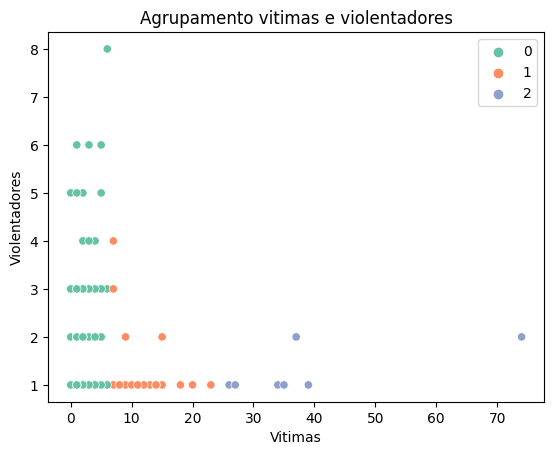

In [14]:
df_f = df_incid2[['victims', 'shooters']]
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_f)
sns.scatterplot(data= df_f, x = 'victims', y = 'shooters', hue=kmeans.labels_, palette= 'Set2')
plt.title('Agrupamento vitimas e violentadores')
plt.xlabel('Vitimas')
plt.ylabel('Violentadores')

In [50]:
df_incid2.Hostages

0        No
1        No
2        No
3       NaN
4        No
       ... 
2064     No
2065     No
2066     No
2067     No
2068     No
Name: Hostages, Length: 2069, dtype: object

In [44]:
df_incid2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Incident_ID         2069 non-null   object 
 1   Sources             2069 non-null   object 
 2   Number_News         694 non-null    object 
 3   Media_Attention     734 non-null    object 
 4   Reliability         2069 non-null   int64  
 5   Date                2069 non-null   object 
 6   Quarter             2058 non-null   object 
 7   School              2068 non-null   object 
 8   City                2069 non-null   object 
 9   State               2069 non-null   object 
 10  School_Level        2045 non-null   object 
 11  Location            2066 non-null   object 
 12  Location_Type       2064 non-null   object 
 13  During_School       2047 non-null   object 
 14  Time_Period         1905 non-null   object 
 15  First_Shot          1594 non-null   object 
 16  Summar

In [52]:
df_incid3 = pd.get_dummies(df_incid2, columns=['Quarter', 'Bullied', 'Domestic_Violence', 'Gang_Related', 'Preplanned', 'School_Level', 'During_School', 'Time_Period', 'Accomplice'])

In [55]:
object_columns = df_incid3.dtypes[df_incid3.dtypes == 'object']
df_incid3.drop(object_columns.index, axis=1, inplace=True)

In [56]:
df_incid3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Reliability                    2069 non-null   int64  
 1   victims                        2069 non-null   float64
 2   shooters                       2069 non-null   float64
 3   Quarter_Fall                   2069 non-null   uint8  
 4   Quarter_Spring                 2069 non-null   uint8  
 5   Quarter_Summer                 2069 non-null   uint8  
 6   Quarter_Winter                 2069 non-null   uint8  
 7   Bullied_No                     2069 non-null   uint8  
 8   Bullied_Yes                    2069 non-null   uint8  
 9   Domestic_Violence_NO           2069 non-null   uint8  
 10  Domestic_Violence_No           2069 non-null   uint8  
 11  Domestic_Violence_Yes          2069 non-null   uint8  
 12  Gang_Related_No                2069 non-null   u

In [57]:
scaler =StandardScaler()
 
features =scaler.fit(df_incid3)
features =features.transform(df_incid3)
 
# Convert to pandas Dataframe
scaled_df =pd.DataFrame(features,columns=df_incid3.columns)
# Print the scaled data
scaled_df.head(2)

,Reliability,victims,shooters,Quarter_Fall,Quarter_Spring,Quarter_Summer,Quarter_Winter,Bullied_No,Bullied_Yes,Domestic_Violence_NO,...,Time_Period_Night,Time_Period_Not A School Day,Time_Period_Not a School Day,Time_Period_School Event,Time_Period_School Start,Time_Period_Sport Event,Time_Period_Unknown,Accomplice_No,Accomplice_Unknown,Accomplice_Yes
0,1.238471,0.534455,-0.243177,-0.714296,-0.605457,2.906456,-0.627857,0.481194,-0.201853,-0.02199,...,3.926912,-0.02199,-0.220583,-0.160564,-0.236962,-0.334317,-0.076379,0.724353,-0.112811,-0.478145
1,1.238471,-0.533939,-0.243177,-0.714296,-0.605457,2.906456,-0.627857,0.481194,-0.201853,-0.02199,...,-0.254653,-0.02199,-0.220583,-0.160564,-0.236962,-0.334317,-0.076379,0.724353,-0.112811,-0.478145


In [58]:
X = scaled_df.values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

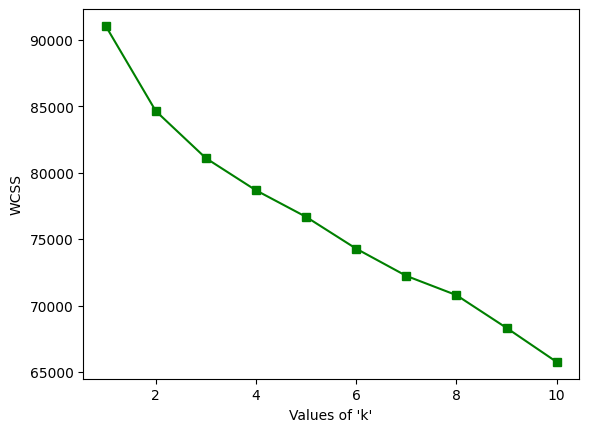

In [60]:
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [61]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [62]:
pca = PCA(2)

reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,-2.609213,-3.208844
1,-2.156518,-0.769764
2,-0.038766,0.737942
3,1.431700,-2.460643
4,-0.215164,0.082097


In [63]:
centers=pca.transform(kmeans.cluster_centers_)
 
# reduced centers
centers

array([[-0.75015397,  1.95234705],
       [ 1.39293964,  0.10180171],
       [-2.00671891, -0.88702409],
       [ 3.54840367, -1.0911133 ]])

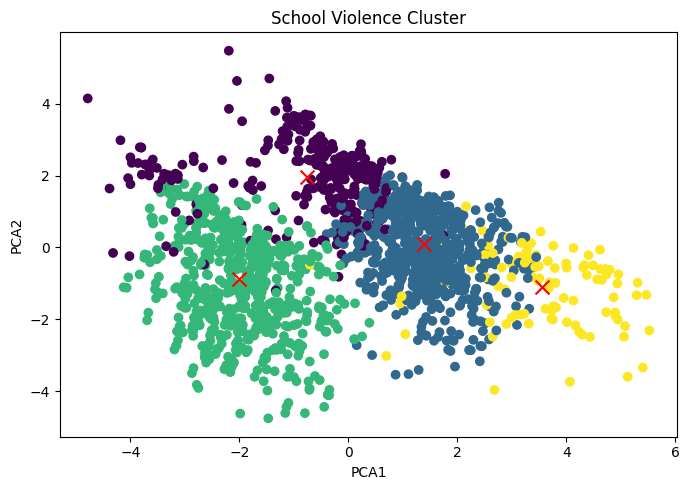

In [64]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('School Violence Cluster')
plt.tight_layout()

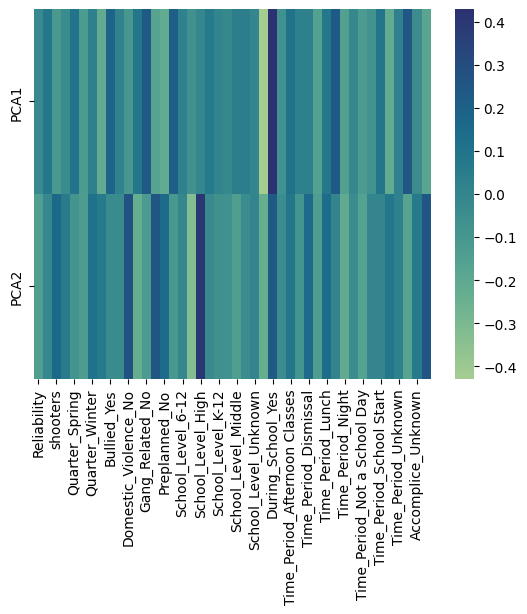

In [65]:
component_df=pd.DataFrame(pca.components_,index=['PCA1',"PCA2"],columns=df_incid3.columns)
# Heat map
sns.heatmap(component_df, cmap="crest")
plt.show()

### Tipo 2

In [66]:
pca = PCA(2)
data = pca.fit_transform(df_incid3)

In [67]:
model1 = KMeans(n_clusters = 4, init = "k-means++")
label = model1.fit_predict(data)
print(label)

[0 0 0 ... 3 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


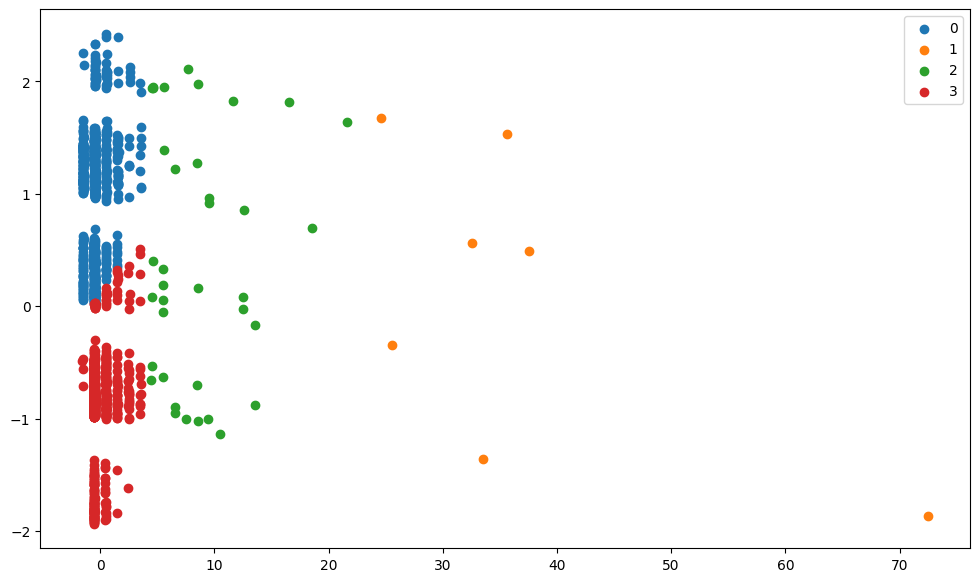

In [69]:
plt.figure(figsize=(12,7))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
  
plt.legend()
plt.show()

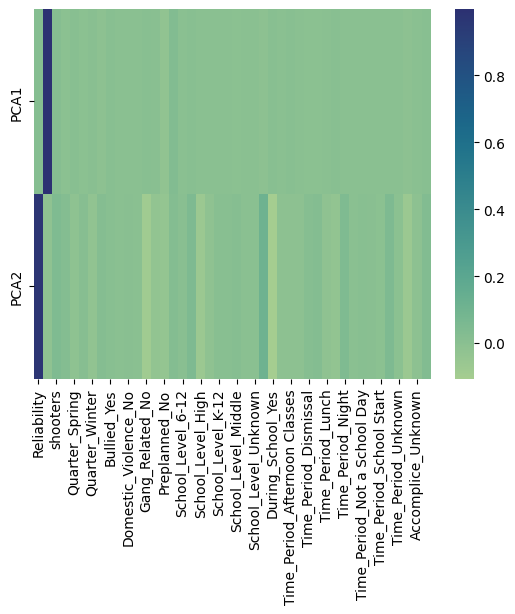

In [70]:
component_df=pd.DataFrame(pca.components_,index=['PCA1',"PCA2"],columns=df_incid3.columns)
# Heat map
sns.heatmap(component_df, cmap="crest")
plt.show()

## PCA and K means

In [15]:
#Classificando as vítimas em Adulto, Adolescente e Criança
def classify_age(age):
    if isinstance(age, str):
        if age.strip() == '':
            return 'Unknown'
        else:
            return age
    else:
        if age < 0:
            return 'Invalid'
        elif age <= 12:
            return 'Child'
        elif age <= 20:
            return 'Teen'
        elif age >20:
            return 'Adult'
        else:
          return 'Unknown'

In [16]:
df_victm['age'] = pd.to_numeric(df_victm['age'], errors='coerce')
df_victm['ageclass'] = df_victm['age'].apply(classify_age)

df_victm

,incidentid,race,injury,gender,schoolaffiliation,age,ageclass
0,20220620ILGRC,NaN,Wounded,Female,No Relation,34.0,Adult
1,20220620ILGRC,NaN,Wounded,Male,No Relation,16.0,Teen
2,20220620ILGRC,NaN,Wounded,Female,No Relation,17.0,Teen
3,20220609ALWAG,Black,Fatal,Male,No Relation,32.0,Adult
4,20220605INWEG,NaN,Wounded,Male,NaN,19.0,Teen
...,...,...,...,...,...,...,...
3094,19700323CADAL,NaN,Wounded,Male,Student,16.0,Teen
3095,19700206OHJOC,NaN,Wounded,Male,Student,18.0,Teen
3096,19700105DCUNW,NaN,None,Male,Unknown,16.0,Teen
3097,19700105DCSOW,NaN,Wounded,Male,Student,NaN,Unknown


Axes(0.125,0.11;0.775x0.77)


0       34.0
1       16.0
2       17.0
3       32.0
4       19.0
        ... 
3094    16.0
3095    18.0
3096    16.0
3097    16.0
3098    15.0
Name: ageinterp, Length: 3099, dtype: float64

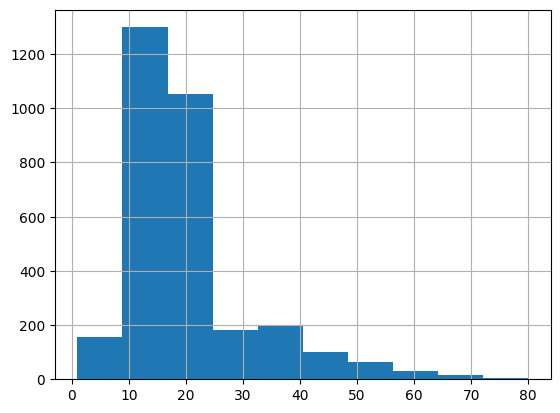

In [17]:
nan_interpol = df_victm['age'].fillna(df_victm['age'].interpolate(method='nearest')) #verificando a coerência da interpolação das idades
print(nan_interpol.hist())
df_victm['ageinterp'] = df_victm['age'].fillna(df_victm['age'].interpolate(method='nearest'))
df_victm['ageinterp']

In [18]:
df_shoot.rename(columns={'incidentid':'Incident_ID'}, inplace=True)

In [19]:
df_victm.rename(columns={'incidentid':'Incident_ID'}, inplace=True)

In [20]:
df_weapn.rename(columns={'incidentid':'Incident_ID'}, inplace=True)

In [ ]:
dfm1 = df_reg.merge(df_shoot, on='Incident_ID')
dfm2 = dfm1.merge(df_victm, on='Incident_ID')
df_merged = dfm2.merge(df_weapn, on='Incident_ID')
df_merged.info()

In [22]:
df_dummies = pd.get_dummies(df_merged, columns=['Quarter', 'Bullied', 'Domestic_Violence', 'Gang_Related', 'Preplanned', 'gender_x', 'race_x', 'schoolaffiliation_x', 'shooteroutcome', 'shooterdied', 'injury_x', 'race_y', 'injury_y', 'gender_y', 'schoolaffiliation_y', 'ageclass'])

In [23]:
df_dummies.drop(['Incident_ID', 'Sources', 'Number_News', 'Media_Attention', 'School', 'City', 'State', 'Date', 'chargesfiled', 'verdict', 'minorchargedadult', 'criminalhistory', 'School_Level', 'Location', 'Location_Type', 'During_School'], axis=1, inplace=True)

In [24]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4151 entries, 0 to 4150
Columns: 119 entries, Reliability to ageclass_Unknown
dtypes: float64(2), int64(1), object(19), uint8(97)
memory usage: 1.1+ MB


In [25]:
object_columns = df_dummies.dtypes[df_dummies.dtypes == 'object']
df_dummies.drop(object_columns.index, axis=1, inplace=True)

In [ ]:
df_dummies.info()

In [ ]:
sns.heatmap(df_dummies)

In [28]:
df_dummies = df_dummies.fillna(0)

In [30]:
scaler =StandardScaler()
 
features =scaler.fit(df_dummies)
features =features.transform(df_dummies)
 
# Convert to pandas Dataframe
scaled_df =pd.DataFrame(features,columns=df_dummies.columns)
# Print the scaled data
scaled_df.head(2)

,Reliability,age_y,ageinterp,Quarter_Fall,Quarter_Spring,Quarter_Summer,Quarter_Winter,Bullied_No,Bullied_Yes,Domestic_Violence_NO,...,schoolaffiliation_y_Rival School Student,schoolaffiliation_y_Security Guard,schoolaffiliation_y_Student,schoolaffiliation_y_Teacher,schoolaffiliation_y_Unknown,schoolaffiliation_y_Visiting Student,ageclass_Adult,ageclass_Child,ageclass_Teen,ageclass_Unknown
0,0.761616,1.785134,1.369897,-0.616803,-0.746334,3.642061,-0.646665,0.651163,-0.405433,-0.034727,...,-0.026893,-0.058173,-1.358344,-0.234862,-0.089519,-0.015523,2.746116,-0.271002,-0.860925,-0.797612
1,0.761616,0.338321,-0.329042,-0.616803,-0.746334,3.642061,-0.646665,0.651163,-0.405433,-0.034727,...,-0.026893,-0.058173,-1.358344,-0.234862,-0.089519,-0.015523,-0.364151,-0.271002,1.161542,-0.797612


In [31]:
x = scaled_df.values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

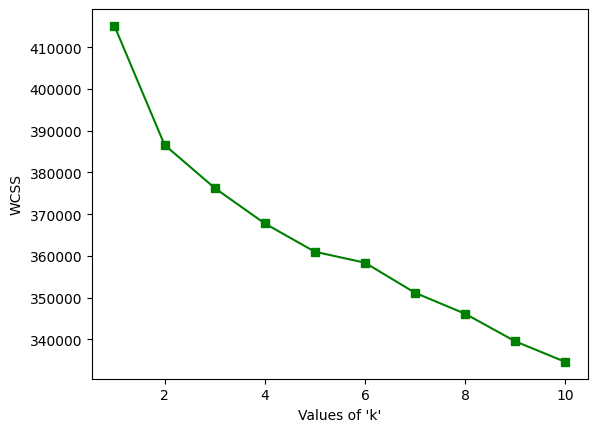

In [32]:
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [34]:
pca = PCA(2)

reduced_X=pd.DataFrame(data=pca.fit_transform(x),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,-2.628474,4.145135
1,-2.895666,1.292967
2,-2.549783,1.600123
3,-1.626183,0.410412
4,-1.626183,0.410412


In [35]:
centers=pca.transform(kmeans.cluster_centers_)
 
# reduced centers
centers

array([[-0.6101236 ,  4.33911299],
       [-2.32771933,  0.38658173],
       [-0.77310675, -1.14569493],
       [ 4.8318036 ,  0.09731866]])

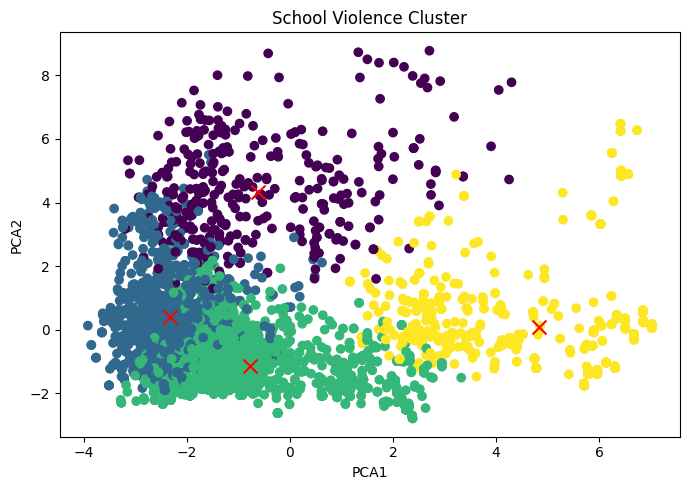

In [36]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('School Violence Cluster')
plt.tight_layout()

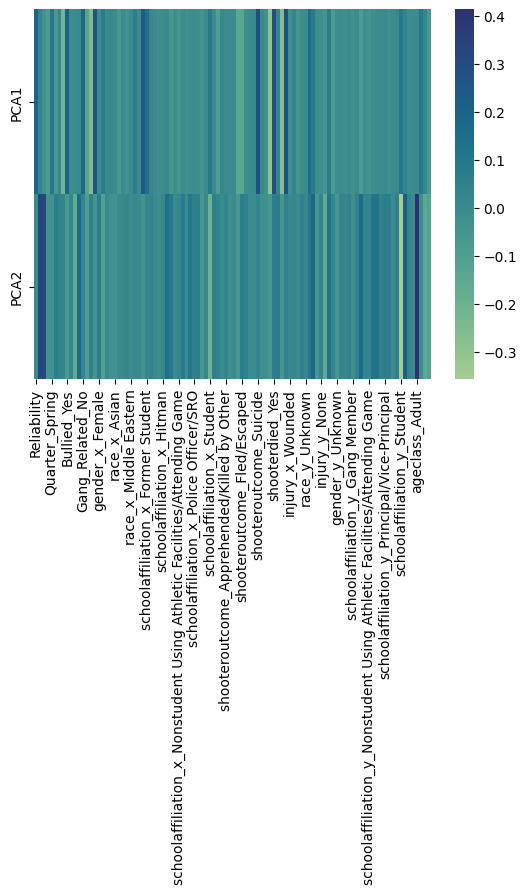

In [38]:
component_df=pd.DataFrame(pca.components_,index=['PCA1',"PCA2"],columns=df_dummies.columns)
# Heat map
sns.heatmap(component_df, cmap="crest")
plt.show()